# Campaign Success Predictor

This is a simplified notebook for my PyCon talk, for demo purposes. :)

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
import warnings
import math

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

## Load Dataset

In [23]:
df = pd.read_csv("details.csv")

In [24]:
X_train = pd.read_csv("X_train_w_tfidf.csv")
X_test = pd.read_csv("X_test_w_tfidf.csv")
y_train = pd.read_csv("y_train.csv")['collected_amt']
y_test = pd.read_csv("y_test.csv")['collected_amt']

In [25]:
df.head()

,id,campaign_url,title_wc,short_wc,story_wc,collected_amt,donation_target_amt,is_org,img_cnt,vid_cnt,...,update_cnt,reward_cnt,max_reward,min_reward,total_weight,median_weight,avg_weight,fb_reaction_count,fb_comment_count,fb_share_count
0,0,https://kitabisa.com/savemugo,5.0,21.0,719.0,9713389.0,10400000,0.0,21.0,1.0,...,2.0,4.0,5000000.0,100000.0,0.398104,0.000000,0.000131,92,18,4
1,1,https://kitabisa.com/senyumuntukfatur,3.0,19.0,246.0,6432905.0,15000000,0.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.148271,0.000000,0.000185,6,1,7
2,2,https://kitabisa.com/musholahampirroboh,4.0,15.0,186.0,7257111.0,30000000,0.0,12.0,0.0,...,9.0,0.0,0.0,0.0,0.183283,0.001464,0.000291,1064,98,136
3,3,https://kitabisa.com/infifteenityspecial,7.0,22.0,248.0,50118.0,59478000,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.124878,0.000000,0.000113,3,1,8
4,4,https://kitabisa.com/buahhati,6.0,22.0,409.0,4075851.0,500000000,0.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.268064,0.000000,0.000186,47,1,16


## Columns

In [26]:
df.columns

Index([u'id', u'campaign_url', u'title_wc', u'short_wc', u'story_wc',
       u'collected_amt', u'donation_target_amt', u'is_org', u'img_cnt',
       u'vid_cnt', u'donor_cnt', u'fundraiser_cnt', u'update_cnt',
       u'reward_cnt', u'max_reward', u'min_reward', u'total_weight',
       u'median_weight', u'avg_weight', u'fb_reaction_count',
       u'fb_comment_count', u'fb_share_count'],
      dtype='object')

In [27]:
len(df.columns)

22

## Stats

In [28]:
print "Average donation target amount: {}".format(np.average(df["donation_target_amt"]))
print "Minimum donation target amount: {}".format(np.min(df["donation_target_amt"]))
print "Maximum donation target amount: {}".format(np.max(df["donation_target_amt"]))

Average donation target amount: 878035998.673
Minimum donation target amount: 200000
Maximum donation target amount: 1650000000000


In [29]:
print "Average collected amount: {}".format(np.average(df["collected_amt"]))
print "Minimum collected amount: {}".format(np.min(df["collected_amt"]))
print "Maximum collected amount: {}".format(np.max(df["collected_amt"]))

Average collected amount: 16887005.9773
Minimum collected amount: 20000.0
Maximum collected amount: 3189965980.0


## Drop unnecessary columns

In [30]:
dropped_columns = ['Unnamed: 0', 'id', 'campaign_url', 'median_weight', 'total_weight', 'avg_weight']

In [31]:
X_train = X_train.drop(dropped_columns, axis=1)
X_test = X_test.drop(dropped_columns, axis=1)

## Standardization and Transformation

In [35]:
scalerX = StandardScaler().fit(X_train)
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)

y_train = np.log1p(y_train) # log transformation

In [47]:
len(X_test[0])

17

## Random Forest

In [36]:
rf = RandomForestRegressor(n_estimators=300)
rf.fit(X_train, y_train)
prediction = rf.predict(X = X_test)
prediction_ori_scale = np.expm1(prediction)

In [37]:
# RMSE
rmse = np.sqrt(np.mean((y_test-prediction_ori_scale)**2))
rmse

14606034.523203889

In [38]:
# R^2
r2 = metrics.r2_score(np.array(y_test), np.array(prediction_ori_scale))
r2

0.59164570215139789

## Save the Model


In [39]:
file_name = 'model.sav'
joblib.dump(rf, file_name)

['model.sav']

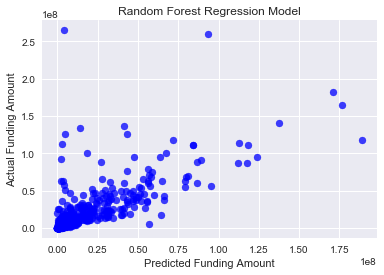

In [40]:
plt.scatter(prediction_ori_scale, y_test, alpha=.75, color='b')
plt.xlabel('Predicted Funding Amount')
plt.ylabel('Actual Funding Amount')
plt.title('Random Forest Regression Model')
plt.show()